In [22]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [54]:
df=pd.read_excel('data.xls')
df=df.drop(['country'],axis=1)
df=df[df['price']>0]
df.rename(columns={'statezip':'zip'}, inplace=True)
df['zip']=df['zip'].str.replace('WA','').astype(int)
df['floors']=df['floors'].astype(int)
df
y=df['price']
X=df.drop(['price'],axis=1)


In [49]:
max_cardinality = 10
high_cardinality = [col for col in X.select_dtypes(exclude=np.number)
                   if X[col].nunique() > max_cardinality]
X = X.drop(high_cardinality, axis=1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [51]:
models = [DummyRegressor(strategy='mean'),
          RandomForestRegressor(n_estimators=170,max_depth=25),
          DecisionTreeRegressor(max_depth=25),
          GradientBoostingRegressor(learning_rate=0.01,n_estimators=200,max_depth=5), 
          LinearRegression(n_jobs=10, normalize=True)]
df_models = pd.DataFrame()
temp = {}

DummyRegressor(constant=None, quantile=None, strategy='mean')
RMSE score 374992.9284009711
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
RMSE score 276726.5992440638
DecisionTreeRegressor(criterion='mse', max_depth=25, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
RMSE score 620477.8017826976
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=5, max_features=None,
     

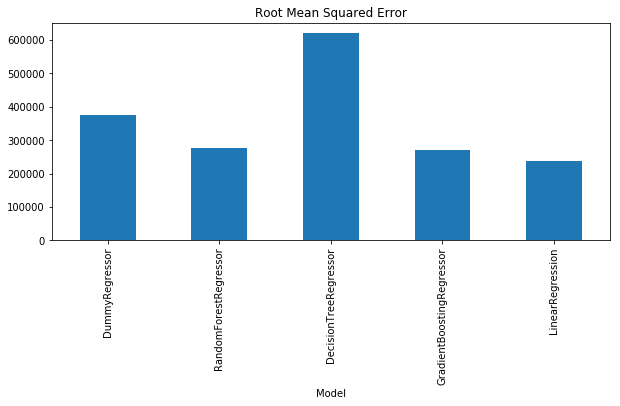

In [52]:
#run through models
for model in models:
    print(model)
    m = str(model)
    temp['Model'] = m[:m.index('(')]
    model.fit(X_train, y_train)
    temp['RMSE_Price'] = sqrt(mse(y_test, model.predict(X_test)))
    print('RMSE score',temp['RMSE_Price'])
    df_models = df_models.append([temp])
df_models.set_index('Model', inplace=True)

fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
df_models.RMSE_Price.plot(ax=axes, kind='bar', title='Root Mean Squared Error')
plt.show()

In [53]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zip
count,4.551000e+03,4551.000000,4551.000000,4551.000000,4.551000e+03,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,5.579059e+05,3.394639,2.155021,2132.372226,1.483528e+04,1.459240,0.006592,0.234674,3.449352,1822.221710,310.150516,1970.795649,808.564052,98079.397056
std,5.639299e+05,0.904595,0.776351,955.949708,3.596408e+04,0.552355,0.080932,0.765373,0.675160,854.452888,461.987629,29.760073,979.421487,53.048784
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000
25%,3.262643e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.000000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,98072.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097800e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000,98117.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.000000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,98354.000000
